In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import encodings #dataset might not be in desired format so to convert data using encode.
from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import AnchoredText
from matplotlib.backends.backend_pdf import PdfPages #to convert my plotted graphs to pdf
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("1.csv",encoding="latin1") # file name 1 is my file name dataset provided by kaggle might be different and I have used latin1 encoding you can use UTF-8 or ISO according to your ease.

In [42]:
df.head(2)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009


In [5]:
#as year is in format of dd/mm/yyyy which is useless we will take year only from the Year column and drop the rest using datetime function.


In [6]:
df['Year']=pd.to_datetime(df['Year'])

In [7]:
df['Session']=df['Year'].dt.year
#creating a new column with only year extracted from the dataset and later we will drop the whole Year column.

In [43]:
df.head(2) # this should show two columns as Year and Session seprately.

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009


In [9]:
#Now lets drop the Year column and later rename the Session column back to Year.

In [10]:
df.drop('Year',axis=1,inplace=True) # inplace saves the content in the original file or in other words it makes the changes permanent in original file.

In [44]:
df.head(2)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009


In [13]:
df.rename(columns={'Session':'Year'},inplace=True)

In [14]:
df.head(2)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009


In [15]:
#now lets save data to a different csv to preserve it.

In [16]:
df.to_csv("new1.csv",index=True)

In [21]:
col=df.columns

In [113]:
state=df['State Name'].unique()

In [25]:
print(col)
print("="*100)
print(state)

Index(['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'],
      dtype='object')
['ANDHRA PRADESH' 'ASSAM' 'ARUNACHAL PRADESH' 'BIHAR' 'GUJARAT' 'HARYANA'
 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'KARNATAKA' 'KERALA'
 'MADHYA PRADESH' 'MAHARASHTRA' 'MEGHALAYA' 'NAGALAND' 'ORISSA'
 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH'
 'WEST BENGAL' 'CHATTISGARH' 'JHARKHAND' 'UTTARAKHAND' 'MANIPUR'
 'CHHATTISGARH']


In [26]:
len(state) # to calculate no of states.

27

In [27]:
len(col) # to calculate no of columns.

8

In [28]:
df['Quality Parameter'].unique() # to find unique parameter affecting water.

array(['Salinity', 'Fluoride', 'Iron', 'Arsenic', 'Nitrate'], dtype=object)

In [30]:
df['Quality Parameter'].value_counts() # to find no. of each factor occuring in the database.

Iron        302244
Salinity    108923
Fluoride    101041
Arsenic      25705
Nitrate      12329
Name: Quality Parameter, dtype: int64

In [33]:
des=df['Quality Parameter'].groupby(df['State Name']).describe()

In [34]:
#lets save above content for some other use.
#content consists of sate wise quality parameter with unique,top and freq.


In [37]:
des1=pd.DataFrame(eval('des'))

In [39]:
des1.to_csv('description.csv',index=True)

In [40]:
print(des1)

                         Quality Parameter
State Name                                
ANDHRA PRADESH    count               2888
                  unique                 2
                  top             Fluoride
                  freq                2193
ARUNACHAL PRADESH count                612
                  unique                 1
                  top                 Iron
                  freq                 612
ASSAM             count              79910
                  unique                 3
                  top                 Iron
                  freq               74098
BIHAR             count              92336
                  unique                 4
                  top                 Iron
                  freq               69970
CHATTISGARH       count              25062
                  unique                 5
                  top                 Iron
                  freq               24439
CHHATTISGARH      count               8815
           

In [46]:
df.groupby('State Name').size() # number of occ of each state in the data set.

State Name
ANDHRA PRADESH         2888
ARUNACHAL PRADESH       612
ASSAM                 79910
BIHAR                 92336
CHATTISGARH           25062
CHHATTISGARH           8815
GUJARAT                2092
HARYANA                 262
HIMACHAL PRADESH         88
JAMMU AND KASHMIR        67
JHARKHAND              3913
KARNATAKA             30824
KERALA                 4800
MADHYA PRADESH        14449
MAHARASHTRA           12480
MANIPUR                  14
MEGHALAYA               427
NAGALAND                618
ORISSA                68620
PUDUCHERRY               17
PUNJAB                 1056
RAJASTHAN            131417
TAMIL NADU             3164
TRIPURA               26235
UTTAR PRADESH          9918
UTTARAKHAND              57
WEST BENGAL           30101
dtype: int64

In [51]:
data=df[['State Name','Quality Parameter']]

In [48]:
print(data)

            State Name Quality Parameter
0       ANDHRA PRADESH          Salinity
1       ANDHRA PRADESH          Fluoride
2       ANDHRA PRADESH          Salinity
3       ANDHRA PRADESH          Salinity
4       ANDHRA PRADESH          Salinity
5       ANDHRA PRADESH          Fluoride
6       ANDHRA PRADESH          Salinity
7       ANDHRA PRADESH          Fluoride
8       ANDHRA PRADESH          Salinity
9       ANDHRA PRADESH          Salinity
10      ANDHRA PRADESH          Salinity
11      ANDHRA PRADESH          Salinity
12      ANDHRA PRADESH          Salinity
13      ANDHRA PRADESH          Salinity
14      ANDHRA PRADESH          Salinity
15      ANDHRA PRADESH          Salinity
16      ANDHRA PRADESH          Salinity
17      ANDHRA PRADESH          Salinity
18      ANDHRA PRADESH          Salinity
19      ANDHRA PRADESH          Salinity
20      ANDHRA PRADESH          Salinity
21      ANDHRA PRADESH          Salinity
22      ANDHRA PRADESH          Salinity
23      ANDHRA P

In [53]:
#now using earlier imported label encoder to categorical in numeric data.

In [54]:
number=LabelEncoder()

In [55]:
data['Quality']=number.fit_transform(data['Quality Parameter'].astype('str'))

C:\Users\Kushagra Jalota\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
data.head(2)

,State Name,Quality Parameter,Quality
0,ANDHRA PRADESH,Salinity,4
1,ANDHRA PRADESH,Fluoride,1


In [59]:
# the above sklearn module Lable encoder has encoded the quality parameter as 
#Salinity : 4
#NItrate : 3
#Iron : 2
#Flouride : 1
#Arsenic: 0

In [61]:
set1=data.groupby(['State Name','Quality Parameter','Quality']).count()

In [65]:
set1.to_html('set1.html') # saving content to html file for further use

In [66]:
set1

Empty DataFrame
Columns: []
Index: [(ANDHRA PRADESH, Fluoride, 1), (ANDHRA PRADESH, Salinity, 4), (ARUNACHAL PRADESH, Iron, 2), (ASSAM, Arsenic, 0), (ASSAM, Fluoride, 1), (ASSAM, Iron, 2), (BIHAR, Arsenic, 0), (BIHAR, Fluoride, 1), (BIHAR, Iron, 2), (BIHAR, Nitrate, 3), (CHATTISGARH, Arsenic, 0), (CHATTISGARH, Fluoride, 1), (CHATTISGARH, Iron, 2), (CHATTISGARH, Nitrate, 3), (CHATTISGARH, Salinity, 4), (CHHATTISGARH, Fluoride, 1), (CHHATTISGARH, Iron, 2), (CHHATTISGARH, Salinity, 4), (GUJARAT, Fluoride, 1), (GUJARAT, Iron, 2), (GUJARAT, Nitrate, 3), (GUJARAT, Salinity, 4), (HARYANA, Fluoride, 1), (HARYANA, Salinity, 4), (HIMACHAL PRADESH, Arsenic, 0), (HIMACHAL PRADESH, Iron, 2), (HIMACHAL PRADESH, Salinity, 4), (JAMMU AND KASHMIR, Fluoride, 1), (JAMMU AND KASHMIR, Iron, 2), (JAMMU AND KASHMIR, Salinity, 4), (JHARKHAND, Arsenic, 0), (JHARKHAND, Fluoride, 1), (JHARKHAND, Iron, 2), (JHARKHAND, Nitrate, 3), (JHARKHAND, Salinity, 4), (KARNATAKA, Arsenic, 0), (KARNATAKA, Fluoride, 1), (KARNATAKA, Iron, 2), (KARNATAKA, Nitrate, 3), (KARNATAKA, Salinity, 4), (KERALA, Fluoride, 1), (KERALA, Iron, 2), (KERALA, Nitrate, 3), (KERALA, Salinity, 4), (MADHYA PRADESH, Fluoride, 1), (MADHYA PRADESH, Iron, 2), (MADHYA PRADESH, Nitrate, 3), (MADHYA PRADESH, Salinity, 4), (MAHARASHTRA, Arsenic, 0), (MAHARASHTRA, Fluoride, 1), (MAHARASHTRA, Iron, 2), (MAHARASHTRA, Nitrate, 3), (MAHARASHTRA, Salinity, 4), (MANIPUR, Iron, 2), (MEGHALAYA, Fluoride, 1), (MEGHALAYA, Iron, 2), (NAGALAND, Iron, 2), (ORISSA, Arsenic, 0), (ORISSA, Fluoride, 1), (ORISSA, Iron, 2), (ORISSA, Nitrate, 3), (ORISSA, Salinity, 4), (PUDUCHERRY, Iron, 2), (PUDUCHERRY, Salinity, 4), (PUNJAB, Fluoride, 1), (PUNJAB, Iron, 2), (PUNJAB, Salinity, 4), (RAJASTHAN, Arsenic, 0), (RAJASTHAN, Fluoride, 1), (RAJASTHAN, Iron, 2), (RAJASTHAN, Nitrate, 3), (RAJASTHAN, Salinity, 4), (TAMIL NADU, Fluoride, 1), (TAMIL NADU, Iron, 2), (TAMIL NADU, Nitrate, 3), (TAMIL NADU, Salinity, 4), (TRIPURA, Iron, 2), (UTTAR PRADESH, Arsenic, 0), (UTTAR PRADESH, Fluoride, 1), (UTTAR PRADESH, Iron, 2), (UTTAR PRADESH, Nitrate, 3), (UTTAR PRADESH, Salinity, 4), (UTTARAKHAND, Arsenic, 0), (UTTARAKHAND, Fluoride, 1), (UTTARAKHAND, Iron, 2), (UTTARAKHAND, Nitrate, 3), (WEST BENGAL, Arsenic, 0), (WEST BENGAL, Fluoride, 1), (WEST BENGAL, Iron, 2), (WEST BENGAL, Salinity, 4)]

[90 rows x 0 columns]

In [68]:
state_count = pd.DataFrame({'count' : data.groupby( [ "State Name", "Quality","Quality Parameter"] ).size()}).reset_index()

In [70]:
state_count.to_html('set1.html')

In [71]:
#Now Take States for analysis one by one

In [88]:
print("-"*100)
print(state)
print("-"*100)

----------------------------------------------------------------------------------------------------
['ANDHRA PRADESH' 'ASSAM' 'ARUNACHAL PRADESH' 'BIHAR' 'GUJARAT' 'HARYANA'
 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'KARNATAKA' 'KERALA'
 'MADHYA PRADESH' 'MAHARASHTRA' 'MEGHALAYA' 'NAGALAND' 'ORISSA'
 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH'
 'WEST BENGAL' 'CHATTISGARH' 'JHARKHAND' 'UTTARAKHAND' 'MANIPUR'
 'CHHATTISGARH']
----------------------------------------------------------------------------------------------------


In [89]:
ANDHRA_PRADESH = state_count[state_count["State Name"] == "ANDHRA PRADESH"]
ASSAM = state_count[state_count["State Name"] == "ASSAM"]
ARUNACHAL_PRADESH= state_count[state_count["State Name"] == "ARUNACHAL PRADESH"]
BIHAR= state_count[state_count["State Name"] == "BIHAR"]
GUJRAT= state_count[state_count["State Name"] == "GUJRAT"]
HARYANA= state_count[state_count["State Name"] == "HARYANA"]
HIMACHAL_PRADESH= state_count[state_count["State Name"] == "HIMACHAL PRADESH"]
JAMMU_AND_KASHMIR= state_count[state_count["State Name"] == "JAMMU AND KASHMIR"]
KARNATAKA= state_count[state_count["State Name"] == "KARNATAKA"]
KERALA= state_count[state_count["State Name"] == "KERALA"]
MADHYA_PRADESH= state_count[state_count["State Name"] == "MADHYA PRADESH"]
MAHARASHTRA= state_count[state_count["State Name"] == "MAHARASHTRA"]
MEGHALAYA= state_count[state_count["State Name"] == "MEGHALAYA"]
NAGALAND= state_count[state_count["State Name"] == "NAGALAND"]
ORISSA= state_count[state_count["State Name"] == "ORISSA"]
PUDUCHERRY= state_count[state_count["State Name"] == "PUDUCHERRY"]
PUNJAB= state_count[state_count["State Name"] == "PUNJAB"]
RAJASTHAN= state_count[state_count["State Name"] == "RAJASTHAN"]
TAMIL_NADU= state_count[state_count["State Name"] == "TAMIL NADU"]
TRIPURA= state_count[state_count["State Name"] == "TRIPURA"]
UTTAR_PRADESH= state_count[state_count["State Name"] == "UTTAR PRADESH"]
WEST_BENGAL= state_count[state_count["State Name"] == "WEST BENGAL"]
CHATTISGARH= state_count[state_count["State Name"] == "CHATTISGARH"]
JHARKHAND= state_count[state_count["State Name"] == "JHARKHAND"]
UTTARAKHAND= state_count[state_count["State Name"] == "UTTARAKHAND"]
MANIPUR= state_count[state_count["State Name"] == "MANIPUR"]
CHHATTISGARH= state_count[state_count["State Name"] == "CHHATTISGARH"]

In [91]:
print("-"*100)
print(ANDHRA_PRADESH)
print("-"*100)

----------------------------------------------------------------------------------------------------
       State Name  Quality Quality Parameter  count
0  ANDHRA PRADESH        1          Fluoride   2193
1  ANDHRA PRADESH        4          Salinity    695
----------------------------------------------------------------------------------------------------


In [92]:
#plot

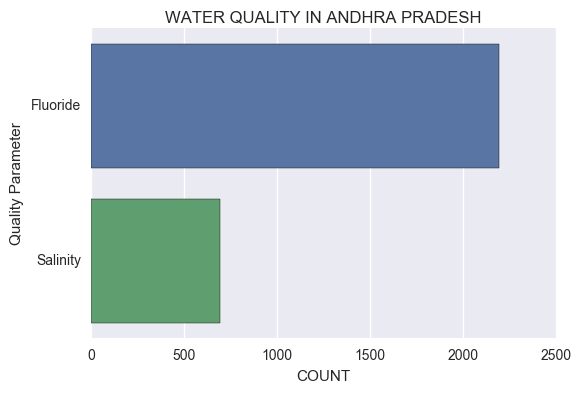

In [109]:
plt.figure(figsize=(6,4))
ax=sns.barplot(x='count',y='Quality Parameter',data=ANDHRA_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ANDHRA PRADESH")
fig=ax.get_figure()
fig.savefig("andhrapradesh.png")

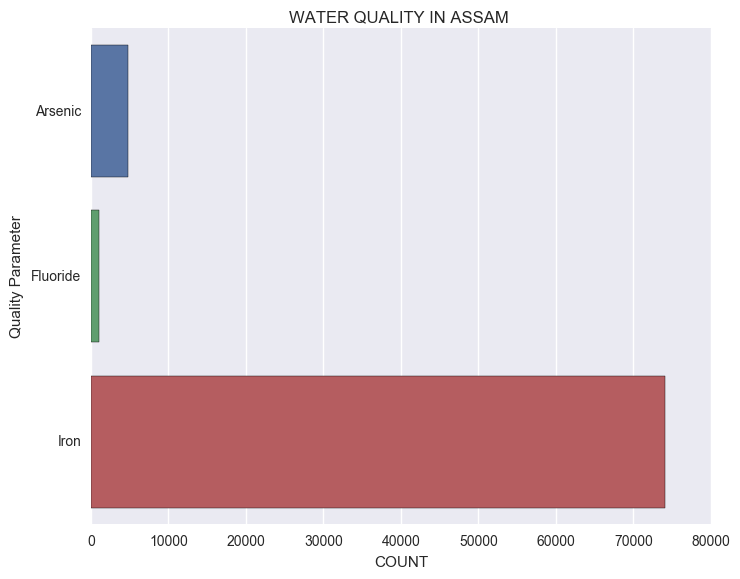

In [110]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=ASSAM)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ASSAM ")
fig=ax.get_figure()
fig.savefig("assam.png")

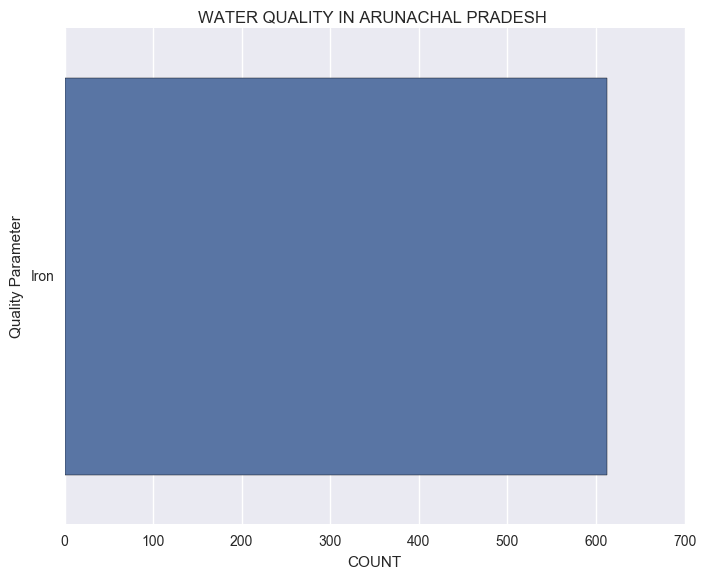

In [115]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=ARUNACHAL_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ARUNACHAL PRADESH ")
fig=ax.get_figure()
fig.savefig("ARUNACHAL PRADESH.png")

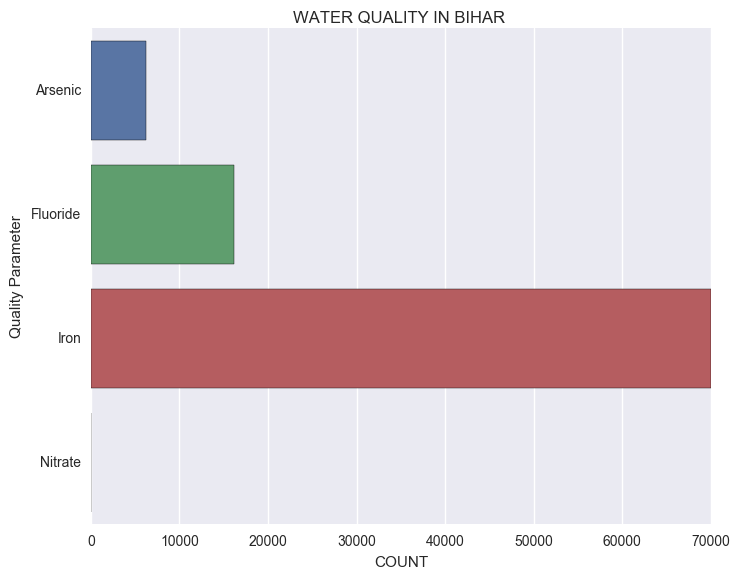

In [116]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=BIHAR)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN BIHAR ")
fig=ax.get_figure()
fig.savefig("BIHAR.png")

In [140]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=GUJRAT)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN GUJRAT ")
fig=ax.get_figure()
fig.savefig("GUJRAT.png") # THIS WILL SHOW ERROR AS GUJRAT IS EMPTY IN OUR DATASET

ValueError: min() arg is an empty sequence

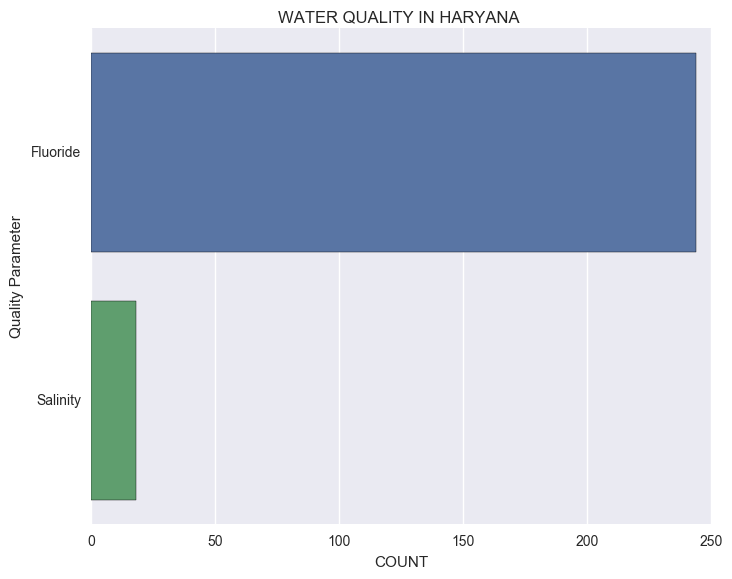

In [118]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=HARYANA)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN HARYANA ")
fig=ax.get_figure()
fig.savefig("HARYANA.png")

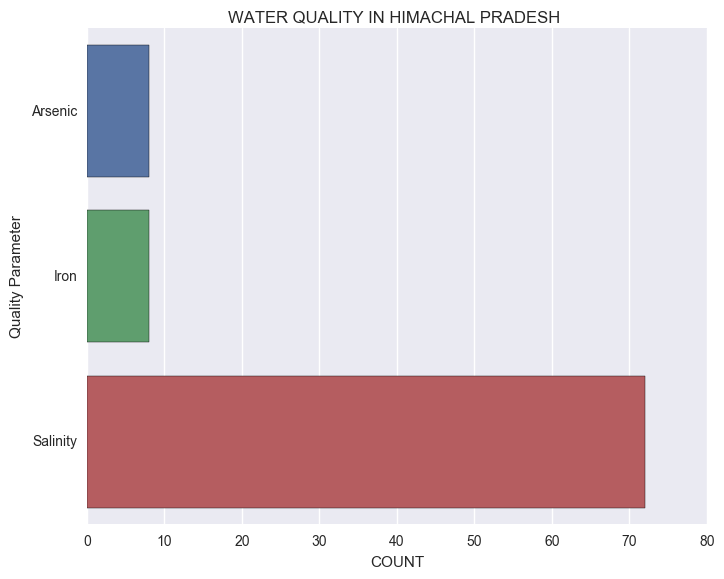

In [119]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=HIMACHAL_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN HIMACHAL PRADESH ")
fig=ax.get_figure()
fig.savefig("HIMACHAL PRADESH.png")

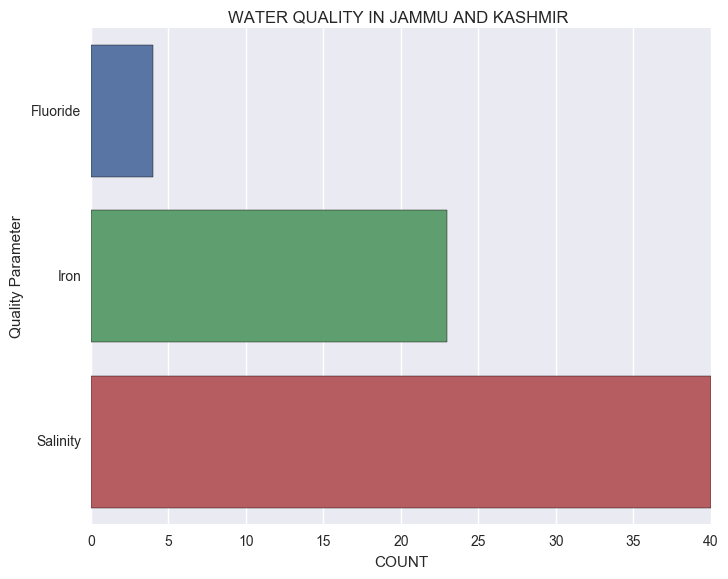

In [120]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=JAMMU_AND_KASHMIR)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN JAMMU AND KASHMIR ")
fig=ax.get_figure()
fig.savefig("JAMMU AND KASHMIR.png")

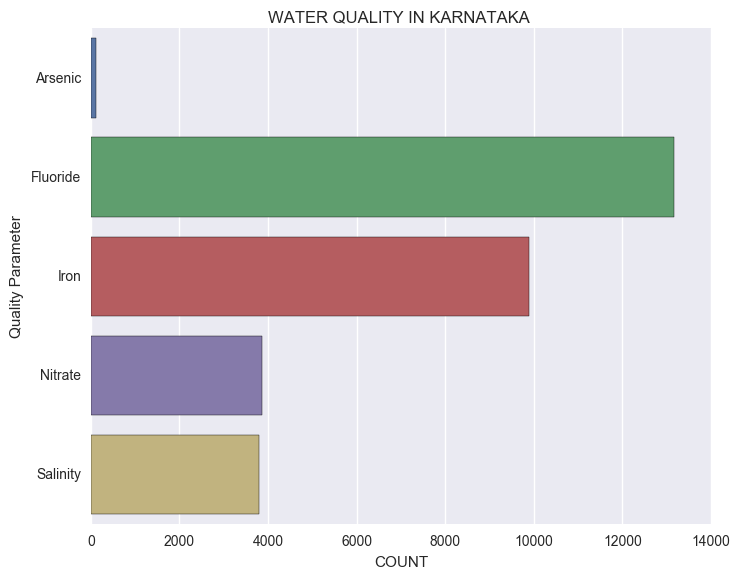

In [121]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=KARNATAKA)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN KARNATAKA ")
fig=ax.get_figure()
fig.savefig("KARNATAKA.png")

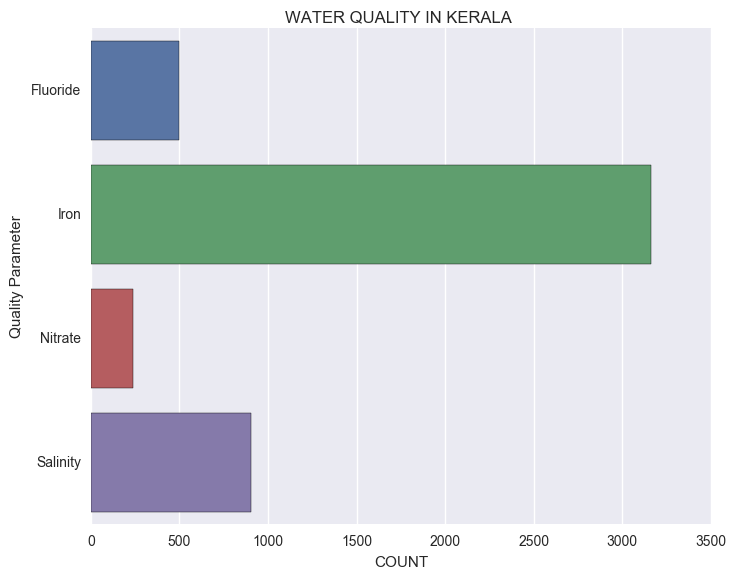

In [122]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=KERALA)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN KERALA ")
fig=ax.get_figure()
fig.savefig("KERALA.png")

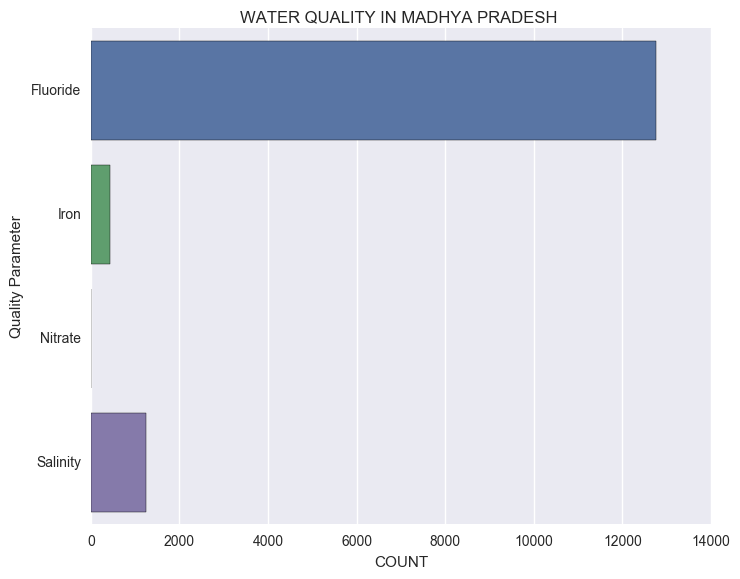

In [123]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=MADHYA_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN MADHYA PRADESH ")
fig=ax.get_figure()
fig.savefig("MADHYA PRADESH.png")

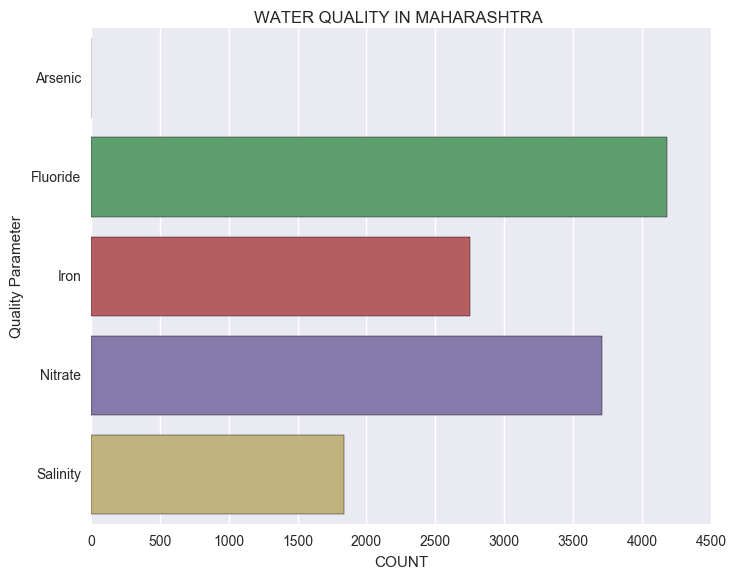

In [124]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=MAHARASHTRA)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN MAHARASHTRA ")
fig=ax.get_figure()
fig.savefig("MAHARASHTRA.png")

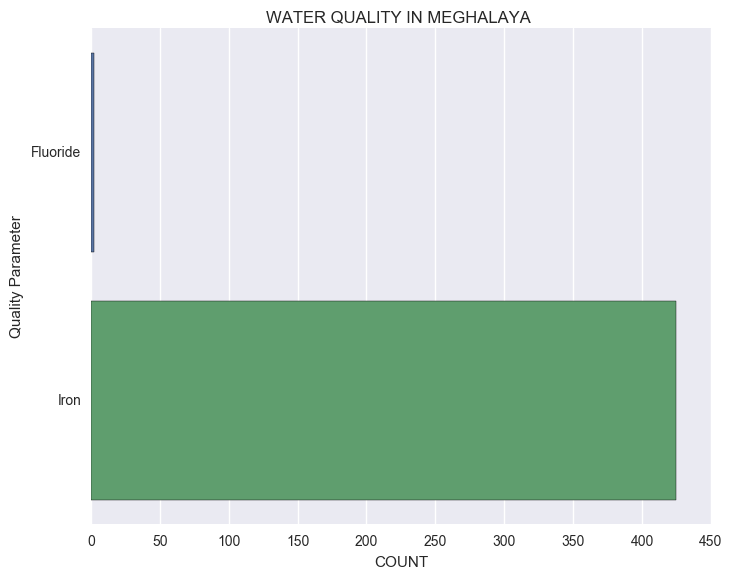

In [125]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=MEGHALAYA)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN MEGHALAYA ")
fig=ax.get_figure()
fig.savefig("MEGHALAYA.png")

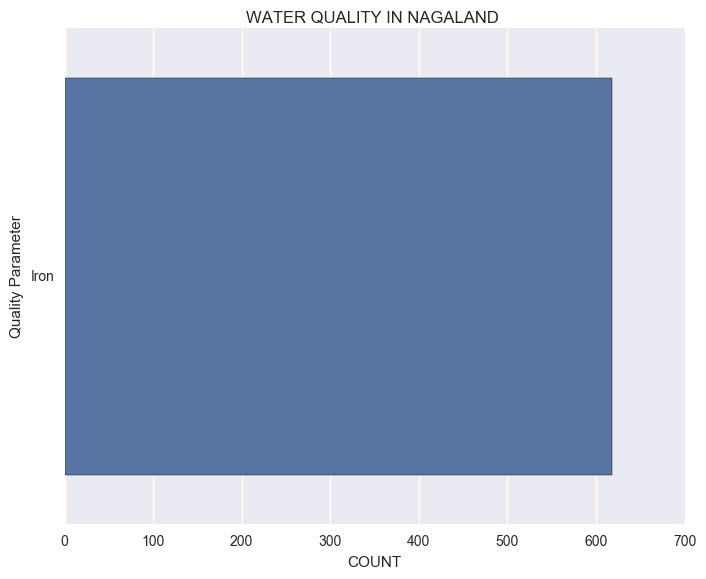

In [126]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=NAGALAND)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN NAGALAND ")
fig=ax.get_figure()
fig.savefig("NAGALAND.png")

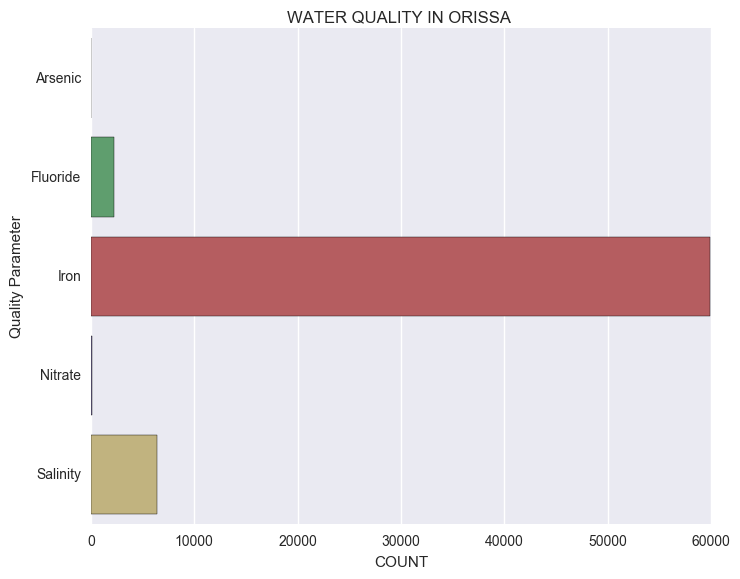

In [127]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=ORISSA)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ORISSA ")
fig=ax.get_figure()
fig.savefig("ORISSA.png")

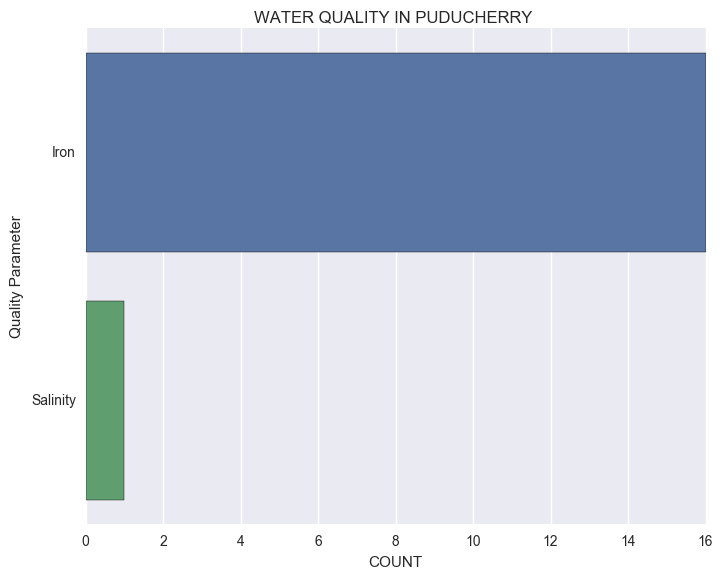

In [128]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=PUDUCHERRY)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN PUDUCHERRY ")
fig=ax.get_figure()
fig.savefig("PUDUCHERRY.png")

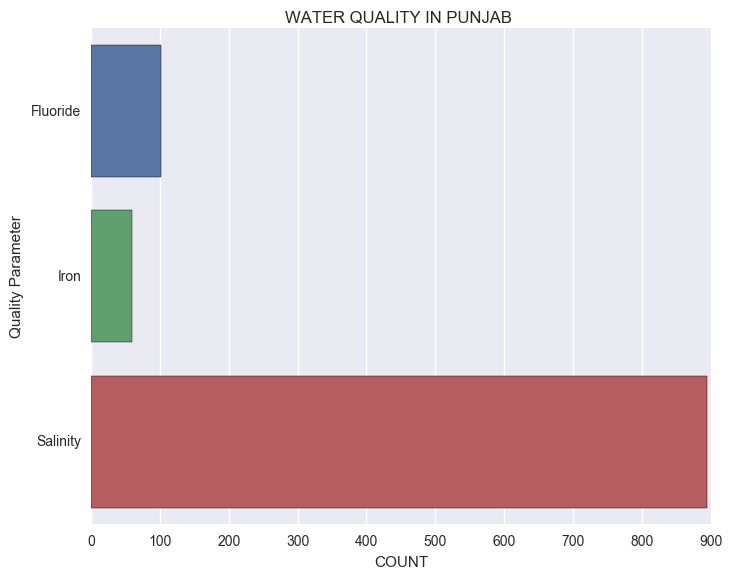

In [129]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=PUNJAB)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN PUNJAB ")
fig=ax.get_figure()
fig.savefig("PUNJAB.png")

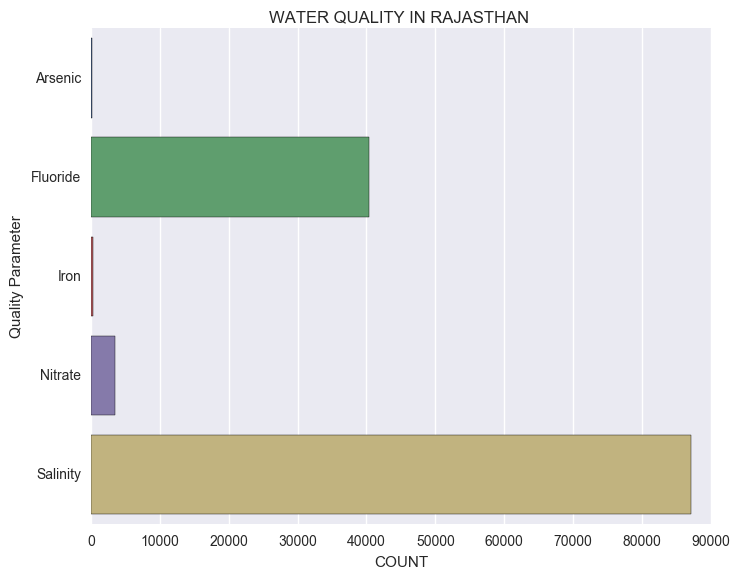

In [130]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=RAJASTHAN)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN RAJASTHAN ")
fig=ax.get_figure()
fig.savefig("RAJASTHAN.png")

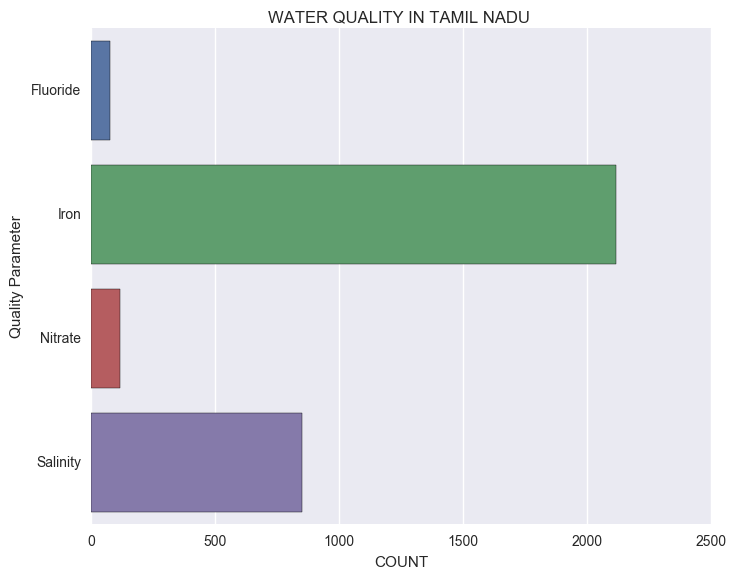

In [131]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=TAMIL_NADU)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN TAMIL NADU ")
fig=ax.get_figure()
fig.savefig("TAMIL NADU.png")

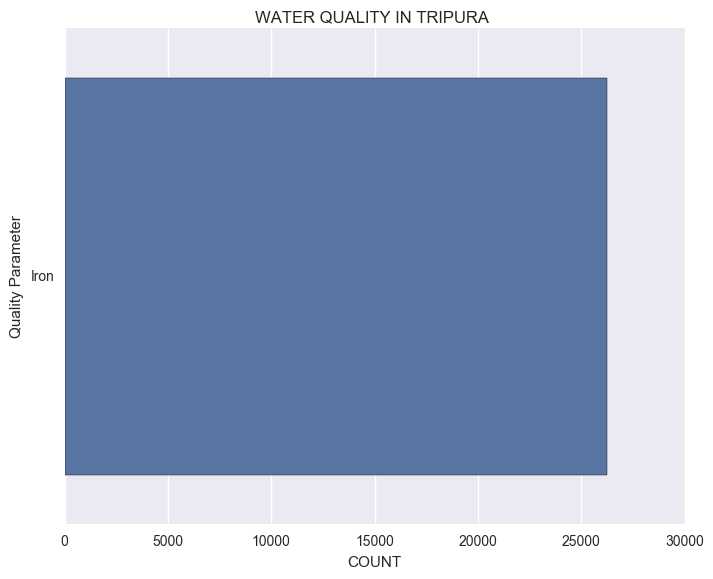

In [132]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=TRIPURA)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN TRIPURA ")
fig=ax.get_figure()
fig.savefig("TRIPURA.png")

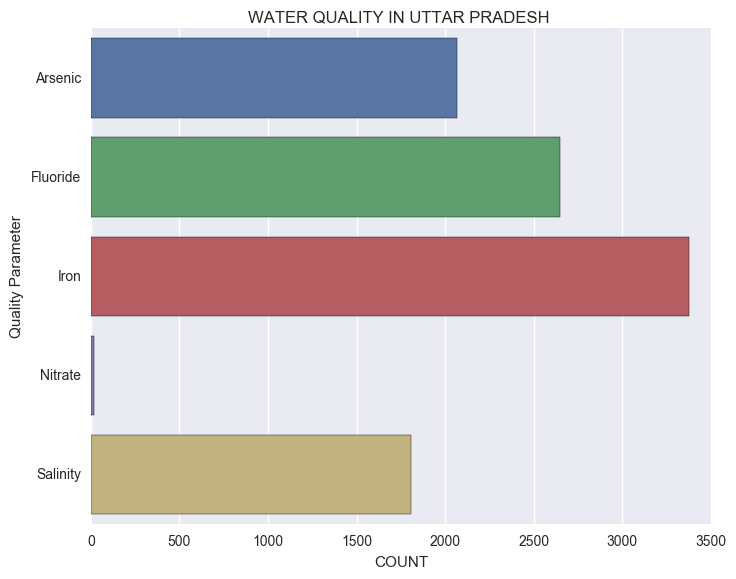

In [133]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=UTTAR_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN UTTAR PRADESH ")
fig=ax.get_figure()
fig.savefig("UTTAR PRADESH.png")

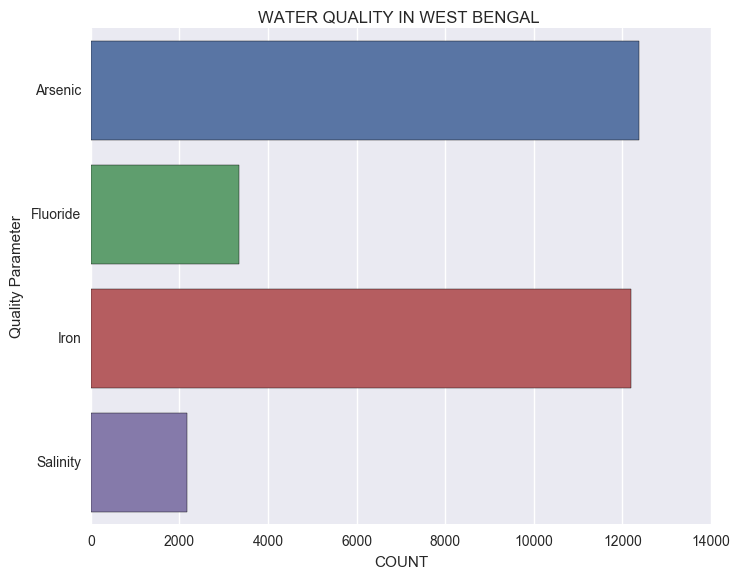

In [134]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=WEST_BENGAL)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN WEST BENGAL ")
fig=ax.get_figure()
fig.savefig("WEST BENGAL.png")

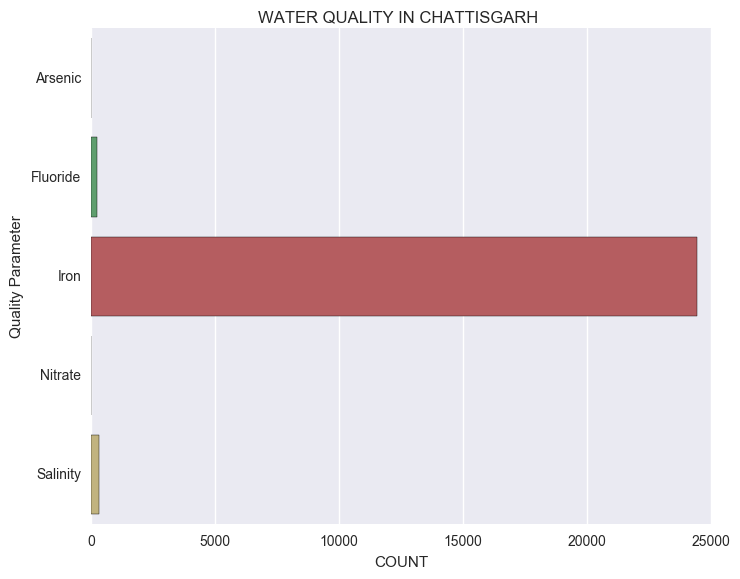

In [135]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=CHATTISGARH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN CHATTISGARH ")
fig=ax.get_figure()
fig.savefig("CHATTISGARH.png")

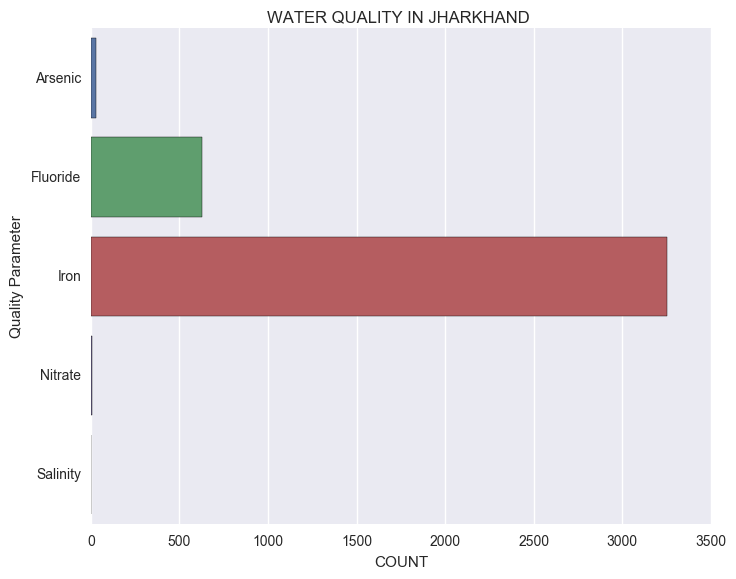

In [136]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=JHARKHAND)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN JHARKHAND ")
fig=ax.get_figure()
fig.savefig("JHARKHAND.png")

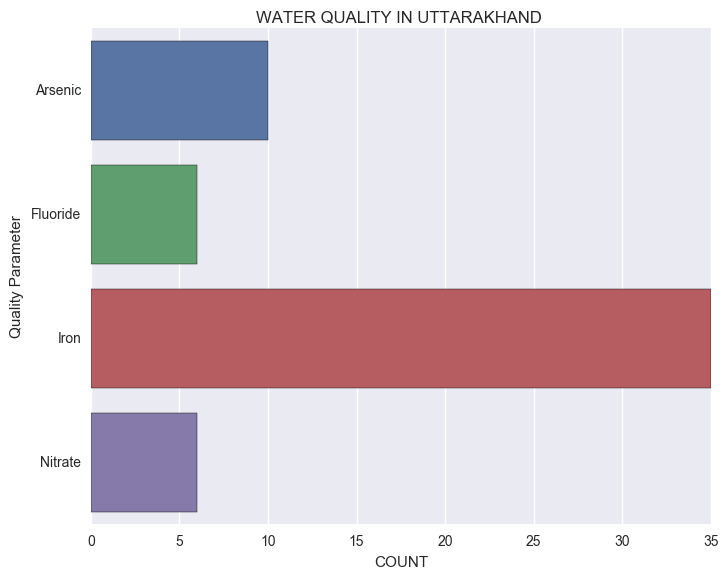

In [137]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=UTTARAKHAND)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN UTTARAKHAND ")
fig=ax.get_figure()
fig.savefig("UTTARAKHAND.png")

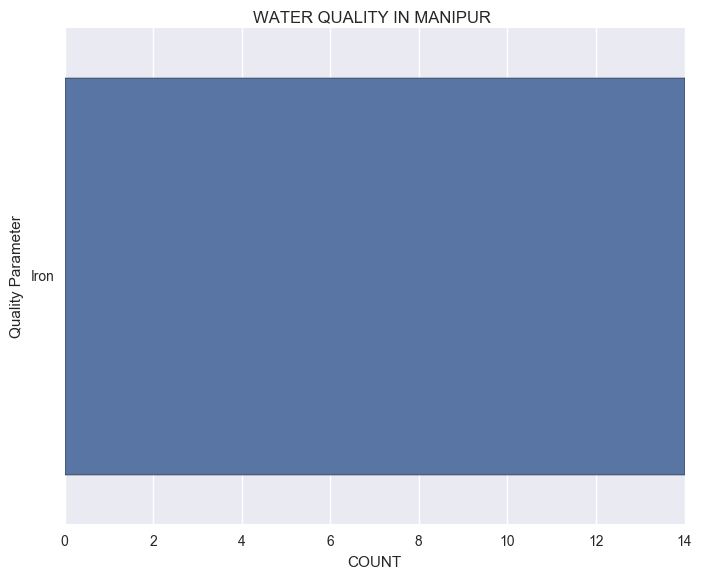

In [138]:
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=MANIPUR)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN MANIPUR ")
fig=ax.get_figure()
fig.savefig("MANIPUR.png")

In [141]:
GUJRAT #CONTENT OF GUJRAT

,State Name,Quality,Quality Parameter,count


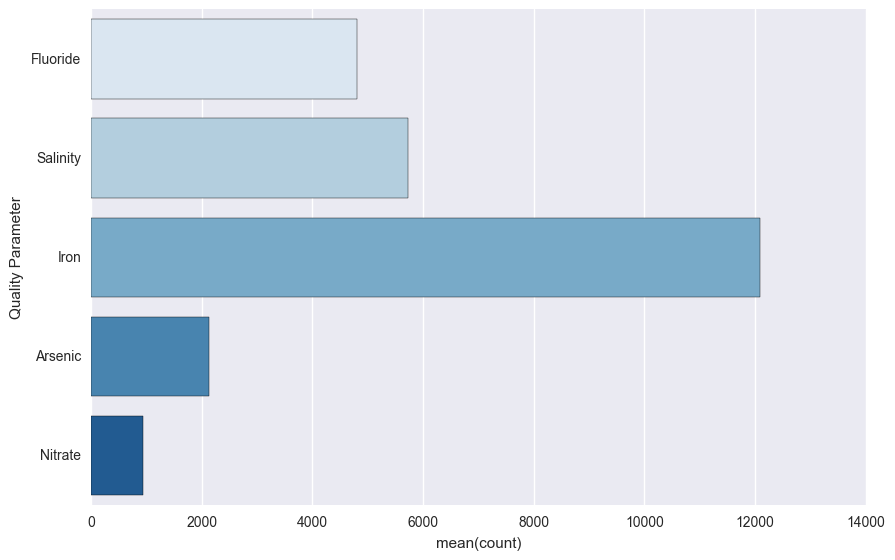

In [145]:
x = state_count.groupby('State Name')
plt.rcParams['figure.figsize'] = (10,6.40)
ax= sns.barplot(y='Quality Parameter', x='count', data=state_count, palette="Blues", ci=None)
plt.show()
fig=ax.get_figure()
fig.savefig("INDIA.png")